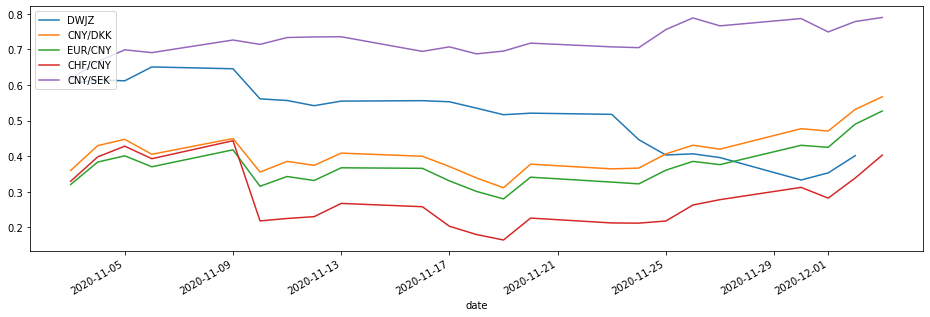

In [1]:
import json
import pandas as pd
import re
from matplotlib import pyplot as plt
from datetime import timedelta

def get_json_file(file_name):
    with open(file_name, mode='r', encoding='utf-8') as file:
        return file.read()

##gold price

gold_price_file_data=get_json_file('gold.json')

pattern=re.compile('jQuery(.+\()?')
gold_price_json_data=json.loads(pattern.sub('',gold_price_file_data)[0:-1])

gold_price_data=pd.Series(gold_price_json_data['Data']['LSJZList']).apply(pd.Series).set_index('FSRQ')[['DWJZ']]

##currency

currency_file_data=get_json_file('currency.json')

currency_json_data=json.loads(currency_file_data)

searchlist=currency_json_data['data']['searchlist']

temp_data=pd.DataFrame(currency_json_data['records']).set_index('date')

currency_data=temp_data['values'].apply(pd.Series,index=searchlist)

##合并数据

data=currency_data.merge(gold_price_data,how='left',left_index=True,right_index=True)

data=data.astype('float64')

data.index=pd.DatetimeIndex(data.index)

fig,ax=plt.subplots(figsize=(16,5))

max_date=data.index.max()
start_date=max_date+timedelta(days=-30)

max_DWJZ=data['DWJZ'].max()
min_DWJZ=data['DWJZ'].min()
data['DWJZ'][(data.index>=start_date) & (data.index<=max_date)].apply(lambda x:(x-min_DWJZ)/(max_DWJZ-min_DWJZ)).plot(ax=ax,label='DWJZ')
data['CNY/DKK'][(data.index>=start_date) & (data.index<=max_date)].apply(lambda x:(1-(x-data['CNY/DKK'].min())/(data['CNY/DKK'].max()-data['CNY/DKK'].min()))).plot(ax=ax,label='CNY/DKK')
data['EUR/CNY'][(data.index>=start_date) & (data.index<=max_date)].apply(lambda x:(x-data['EUR/CNY'].min())/(data['EUR/CNY'].max()-data['EUR/CNY'].min())).plot(ax=ax,label='EUR/CNY')
data['CHF/CNY'][(data.index>=start_date) & (data.index<=max_date)].apply(lambda x:(x-data['CHF/CNY'].min())/(data['CHF/CNY'].max()-data['CHF/CNY'].min())).plot(ax=ax,label='CHF/CNY')
data['CNY/SEK'][(data.index>=start_date) & (data.index<=max_date)].apply(lambda x:(1-(x-data['CNY/SEK'].min())/(data['CNY/SEK'].max()-data['CNY/SEK'].min()))).plot(ax=ax,label='CNY/SEK')
ax.legend(loc='upper left')

fig.savefig('pic.jpg')